## Contours

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
image = cv2.imread('image.jpg')

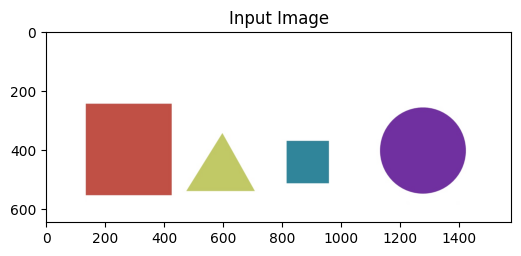

In [4]:
plt.figure(figsize=(6, 10))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')

plt.show()

In [5]:
# Convert image to grayscale
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Extract edges
edged_img = cv2.Canny(gray_img, 30, 200)

# Find contours
contours, hierarchy = cv2.findContours(edged_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

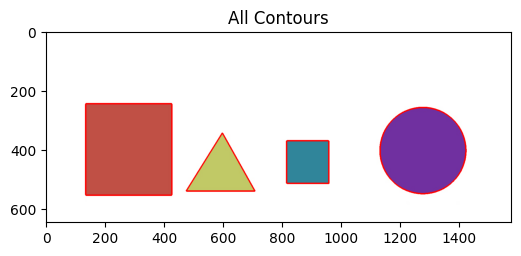

In [6]:
plt.figure(figsize=(6, 10))

# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,0,255), 3)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('All Contours')

plt.show()

### Get center of contour

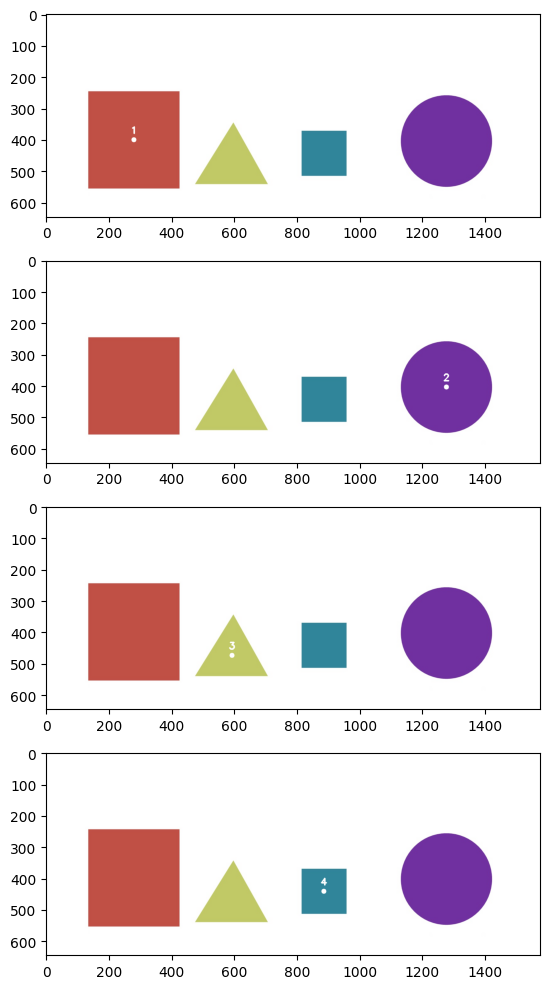

In [7]:
# Sort contours according to contour area
sorted_contours = sorted(contours, key= cv2.contourArea, reverse= True)

plt.figure(figsize=(6, 10))

for i in range(len(contours)):
    # read image again to delete previous countour 
    image = cv2.imread('image.jpg')
    
    M = cv2.moments(sorted_contours[i])
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    
    plt.subplot(4, 1, i+1)
    # draw a circle in the middle of contour
    cv2.circle(image,(cx,cy), 8, (255, 255, 255), -1)
    # write the contour order in area
    cv2.putText(image, str(i+1), (cx-10, cy-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 3)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

## Approximating Contours and Convex Hull 

***cv2.approxPolyDP(contour, Approximation Accuracy, Closed)***
- **contour** – is the individual contour we wish to approximate
- **Approximation Accuracy** – Important parameter is determining the accuracy of the approximation. Small values give precise-  approximations, large values give more generic approximation. A good rule of thumb is less than 5% of the contour perimeter
- **Closed** – a Boolean value that states whether the approximate contour should be open or closed 


### Let's put a rectangle
- We can put a rectangle arround the contour.

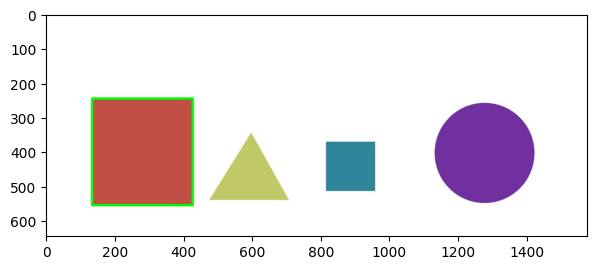

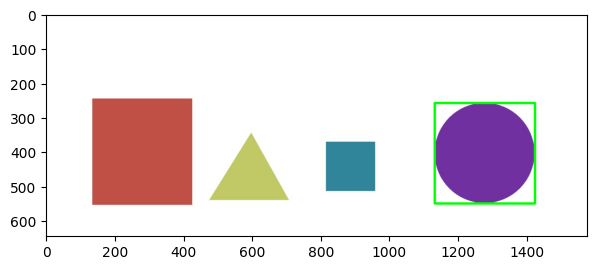

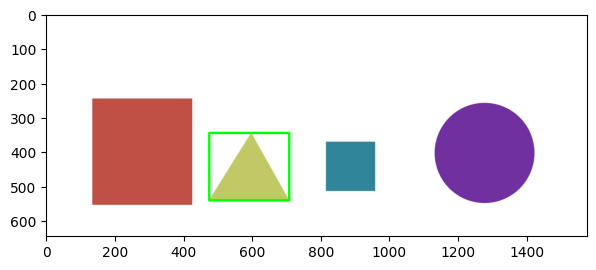

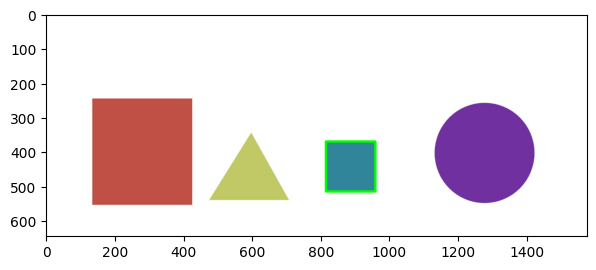

In [8]:
# Sort contours according to contour area
sorted_contours = sorted(contours, key= cv2.contourArea, reverse= True)

for c in sorted_contours:
    # read image again to delete previous countour.
    image = cv2.imread('image.jpg')
    
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 5)  
    
    plt.figure(figsize=(6, 10))
    
    plt.subplot(4, 1, i+1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.tight_layout()
    plt.show()

### Now we will draw an approximate polygon 

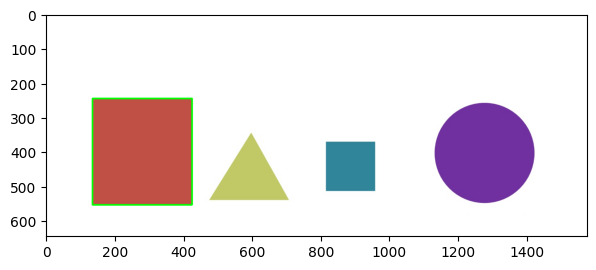

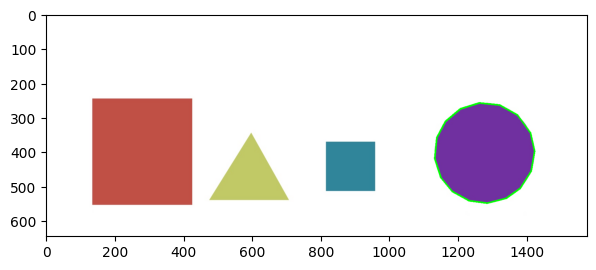

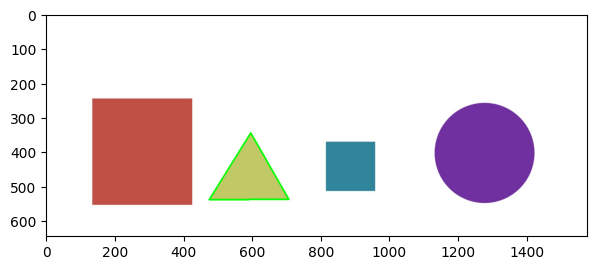

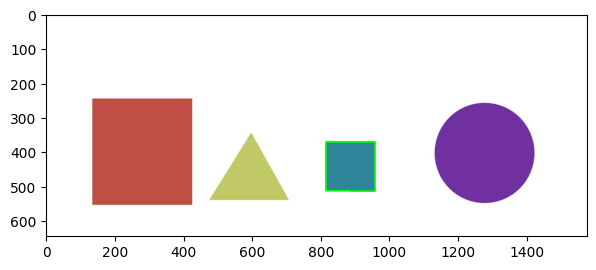

In [9]:
# Sort contours according to contour area
sorted_contours = sorted(contours, key= cv2.contourArea, reverse= True)

for c in sorted_contours:
    # read image again to delete previous countour.
    image = cv2.imread('image.jpg')
    
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.01 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(image, [approx], 0, (0, 255, 0), 4)
    
    plt.figure(figsize=(6, 10))
    
    plt.subplot(4, 1, i+1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.tight_layout()
    plt.show()